In [32]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)


In [33]:
df_sim = pd.read_csv('mtr_sim.csv', index_col=0)
df_sim = df_sim[df_sim.rho > 0.5]
# df_sim.set_index(['name','trail'], drop=True)

In [34]:
df_sim

name       rho  related_ref  time_shift  f1_score    run_time  \
0    S13_10MVC  0.961311          230      -0.006  0.901493  508.755674   
1    S13_10MVC  0.726454          260      -0.006  0.692913  508.755674   
2    S13_10MVC  1.054482          244       0.000  1.000000  508.755674   
3    S13_10MVC  0.527649          247      -0.012  0.500000  508.755674   
5    S14_30MVC  0.583644          351      -0.006  0.512733  597.753368   
..         ...       ...          ...         ...       ...         ...   
677  S10_10MVC  0.686229          134       0.000  0.560584  440.801627   
678  S10_10MVC  0.672998          227      -0.006  0.633540  440.801627   
680  S10_10MVC  0.765200          200       0.000  0.712766  440.801627   
681  S10_10MVC  0.664102          180       0.000  0.616162  440.801627   
682  S10_10MVC  0.693434          259      -0.006  0.661417  440.801627   

     trail  length  MVC  
0        3   65536   10  
1        3   65536   10  
2        3   65536   10  
3        3   65536   10  
5        3   65536   30  
..     ...     ...  ...  
677      9   65536   10  
678      9   65536   10  
680      9   65536   10  
681      9   65536   10  
682      9   65536   10  

[670 rows x 9 columns]

In [35]:
df_sim.groupby(['name','trail']).agg({
    'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count(),'count'],
    'time_shift':['mean'],
    'f1_score':['mean'],
    # 'run_time':['mean','std'],
}).round(4).groupby(['name']).var()

rho related_ref           time_shift  f1_score
               mean  <lambda_0>     count       mean      mean
name                                                          
S10_10MVC  0.002566    1.344444  1.344444   0.000003  0.002407
S11_30MVC  0.005914    0.888889  0.888889   0.000002  0.004977
S12_50MVC  0.006315    0.933333  0.933333   0.000007  0.006931
S13_10MVC  0.005212    0.666667  0.900000   0.000005  0.004849
S14_30MVC  0.010041    1.344444  1.344444   0.000002  0.006157
S15_50MVC  0.006274    0.622222  0.622222   0.000003  0.005907
S1_10MVC   0.006805    4.500000  4.500000   0.000002  0.005757
S2_30MVC   0.002846    0.622222  0.622222   0.000003  0.002562
S3_50MVC   0.007263    0.400000  0.400000   0.000015  0.005915
S4_10MVC   0.004502    1.511111  1.511111   0.000002  0.003664
S5_30MVC   0.009791    0.694444  0.694444   0.000011  0.009433
S6_50MVC   0.006649    1.155556  1.155556   0.000003  0.005703
S7_10MVC   0.002124    2.677778  2.677778   0.000002  0.002319
S8_30MVC   0.007340    1.566667  1.566667   0.000006  0.007256
S9_50MVC   0.007061    1.877778  1.877778   0.000003  0.004294

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

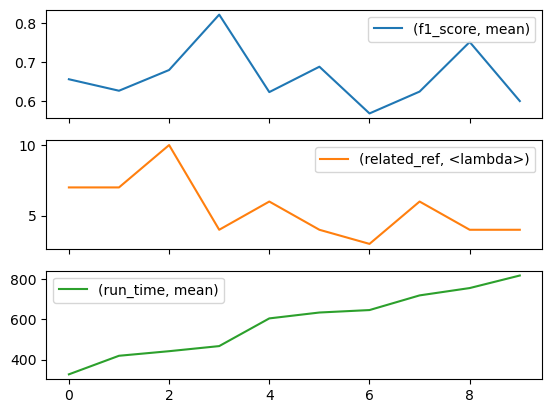

In [36]:
df_sim.groupby(['name','trail']).agg({
    'f1_score':['mean'],
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'run_time':['mean'],
}).round(4).loc['S1_10MVC'].sort_values(by=('run_time','mean')).reset_index(drop=True).plot(subplots=True)

In [37]:
print(df_sim.groupby(['name','trail']).agg({
    'f1_score':['mean'],
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'run_time':['mean'],
}).round(4).loc['S1_10MVC'].sort_values(by=('run_time','mean')).reset_index(drop=True).to_latex())

\begin{tabular}{lrrr}
\toprule
{} & f1\_score & related\_ref &  run\_time \\
{} &     mean &    <lambda> &      mean \\
\midrule
0 &   0.6554 &           7 &  326.6202 \\
1 &   0.6258 &           7 &  418.9031 \\
2 &   0.6792 &          10 &  441.6433 \\
3 &   0.8219 &           4 &  466.9850 \\
4 &   0.6223 &           6 &  604.6058 \\
5 &   0.6877 &           4 &  633.8472 \\
6 &   0.5673 &           3 &  646.0505 \\
7 &   0.6236 &           6 &  718.9394 \\
8 &   0.7514 &           4 &  755.3808 \\
9 &   0.5992 &           4 &  817.7353 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\2355256309.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(4).loc['S1_10MVC'].sort_values(by=('run_time','mean')).reset_index(drop=True).to_latex())


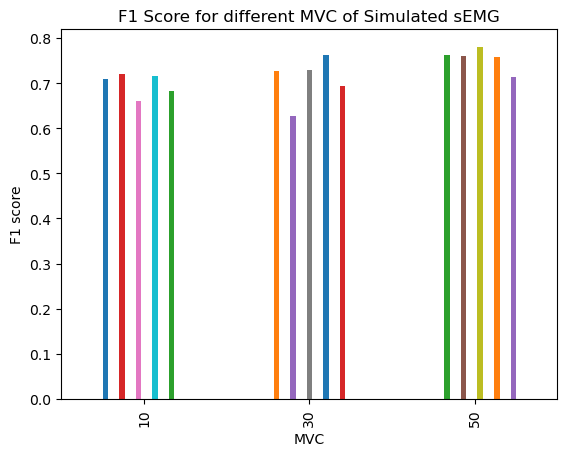

In [38]:
ax = df_sim.groupby(['MVC', 'name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'f1_score':['mean'],
    # 'run_time':['mean','var'],
}).round(3).unstack().plot.bar(legend=False)
ax.set_ylabel('F1 score')
ax.set_title('F1 Score for different MVC of Simulated sEMG')
ax.figure.savefig('figs/f1_score_sim.png')



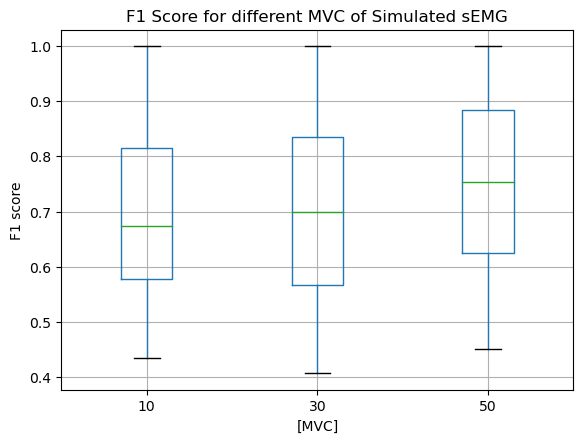

In [75]:
ax =df_sim.boxplot(column='f1_score', by=['MVC'])
# plt.xticks(rotation=45, ha='right')
ax.set_title('F1 Score for different MVC of Simulated sEMG')
ax.set_ylabel('F1 score')
plt.suptitle('')
ax.figure.savefig('figs/f1_score_sim_box.svg')


In [40]:
print(df_sim.groupby(['MVC', 'name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'f1_score':['mean','std','min','max'],
    # 'run_time':['mean','var'],
}).round(3).to_latex())
# ax.set_ylabel('F1 score')
# ax.set_title('F1 Score for different MVC of Simulated sEMG')
# ax.figure.savefig('figs/f1_score_sim.png')



\begin{tabular}{llrrrr}
\toprule
   &          & \multicolumn{4}{l}{f1\_score} \\
   &          &     mean &    std &    min &    max \\
MVC & name &          &        &        &        \\
\midrule
10 & S10\_10MVC &    0.709 &  0.140 &  0.435 &  1.000 \\
   & S13\_10MVC &    0.721 &  0.162 &  0.467 &  1.000 \\
   & S1\_10MVC &    0.661 &  0.149 &  0.443 &  0.948 \\
   & S4\_10MVC &    0.716 &  0.133 &  0.507 &  1.000 \\
   & S7\_10MVC &    0.683 &  0.138 &  0.481 &  1.000 \\
30 & S11\_30MVC &    0.726 &  0.162 &  0.503 &  1.000 \\
   & S14\_30MVC &    0.628 &  0.155 &  0.407 &  0.958 \\
   & S2\_30MVC &    0.729 &  0.154 &  0.498 &  0.997 \\
   & S5\_30MVC &    0.762 &  0.145 &  0.467 &  0.977 \\
   & S8\_30MVC &    0.693 &  0.153 &  0.409 &  0.998 \\
50 & S12\_50MVC &    0.763 &  0.152 &  0.501 &  1.000 \\
   & S15\_50MVC &    0.759 &  0.148 &  0.527 &  1.000 \\
   & S3\_50MVC &    0.780 &  0.138 &  0.538 &  0.970 \\
   & S6\_50MVC &    0.757 &  0.140 &  0.451 &  0.970 \\
   & S9\_50M

C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\2465178224.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


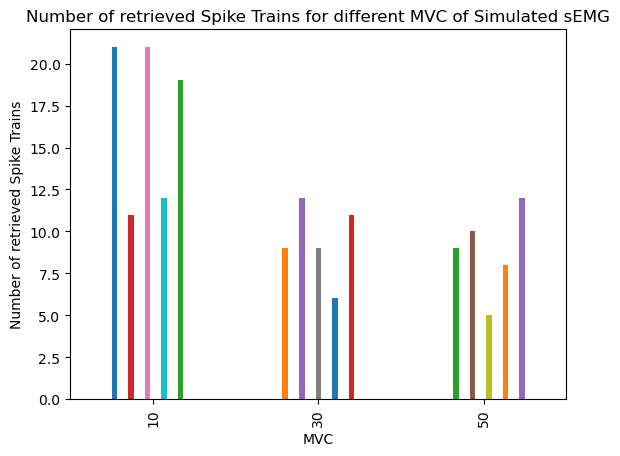

In [41]:
ax = df_sim.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3).unstack().plot.bar(legend=False)
ax.set_ylabel('Number of retrieved Spike Trains')
ax.set_title('Number of retrieved Spike Trains for different MVC of Simulated sEMG') #262
ax.figure.savefig('figs/num_of_retrieved_st.png')


In [137]:
ax = df_sim.groupby(['MVC','name'])['related_ref'].apply(
lambda x: x.value_counts().count()
).round(3).plot(kind='box', by=['MVC'])
ax.set_ylabel('#Number of retrieved Spike Trains')
ax.set_title('Number of retrieved Spike Trains for different MVC Level of Simulated sEMG') #262
# ax.figure.savefig('figs/num_of_retrieved_st')


AttributeError: 'BoxPlot' object has no attribute 'columns'

In [131]:
df_sim.groupby(['MVC','name'])['related_ref'].apply(
lambda x: x.value_counts().count()
)

MVC  name     
10   S10_10MVC    21
     S13_10MVC    11
     S1_10MVC     21
     S4_10MVC     12
     S7_10MVC     19
30   S11_30MVC     9
     S14_30MVC    12
     S2_30MVC      9
     S5_30MVC      6
     S8_30MVC     11
50   S12_50MVC     9
     S15_50MVC    10
     S3_50MVC      5
     S6_50MVC      8
     S9_50MVC     12
Name: related_ref, dtype: int64

In [42]:
print(df_sim.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3).to_latex())

\begin{tabular}{llr}
\toprule
   &          & related\_ref \\
   &          &    <lambda> \\
MVC & name &             \\
\midrule
10 & S10\_10MVC &          21 \\
   & S13\_10MVC &          11 \\
   & S1\_10MVC &          21 \\
   & S4\_10MVC &          12 \\
   & S7\_10MVC &          19 \\
30 & S11\_30MVC &           9 \\
   & S14\_30MVC &          12 \\
   & S2\_30MVC &           9 \\
   & S5\_30MVC &           6 \\
   & S8\_30MVC &          11 \\
50 & S12\_50MVC &           9 \\
   & S15\_50MVC &          10 \\
   & S3\_50MVC &           5 \\
   & S6\_50MVC &           8 \\
   & S9\_50MVC &          12 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\3919827276.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


In [43]:
df_sim.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3).groupby(['MVC']).mean()

related_ref
       <lambda>
MVC            
10         16.8
30          9.4
50          8.8

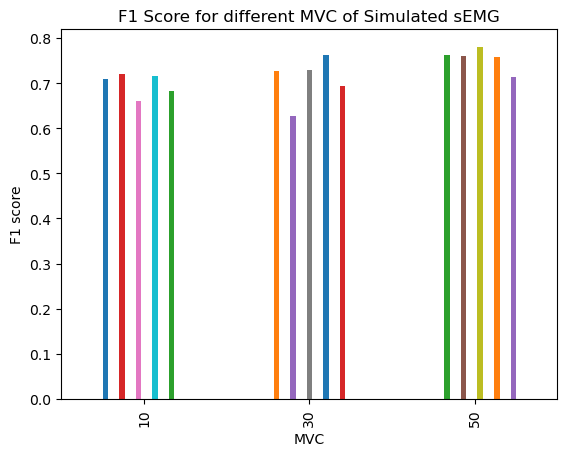

In [96]:
ax = df_sim.groupby(['MVC', 'name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'f1_score':['mean'],
    # 'run_time':['mean','var'],
}).round(3).unstack().plot.bar(legend=False)
ax.set_ylabel('F1 score')
ax.set_title('F1 Score for different MVC of Simulated sEMG')
ax.figure.savefig('figs/f1_score_sim.svg')



Text(0.5, 1.0, 'Run time of Simulated sEMG Signal Decomposition')

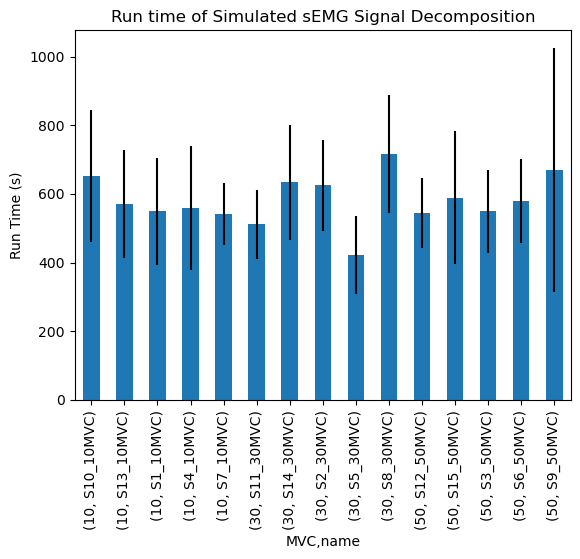

In [45]:
df = df_sim.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    'run_time':['mean','std'],
}).round(3)
ax = df[('run_time','mean')].plot(kind='bar', yerr=df[('run_time','std')], legend=False)
# ax.set_xlabel(df.index.get_level_values(1))
ax.set_ylabel('Run Time (s)')
ax.set_title('Run time of Simulated sEMG Signal Decomposition')
# ax.legend(df.index.get_level_values(1))


Text(0.5, 1.0, 'Run time of Simulated sEMG Signal Decomposition')

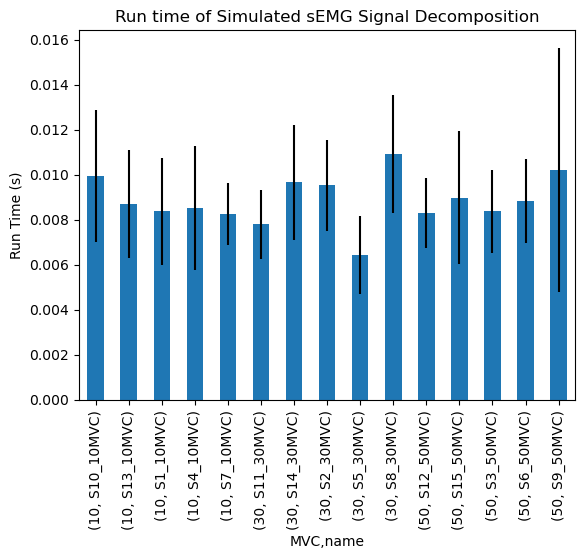

In [46]:
df = df_sim.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    'run_time':['mean','std'],
}).round(3)
df =df/65536
ax = df[('run_time','mean')].plot(kind='bar', yerr=df[('run_time','std')], legend=False)
# ax.set_xlabel(df.index.get_level_values(1))
ax.set_ylabel('Run Time (s)')
ax.set_title('Run time of Simulated sEMG Signal Decomposition')
# ax.legend(df.index.get_level_values(1))


In [47]:
df_sim.groupby(['MVC','name','trail'])['run_time'].apply('mean').mean()

569.7803433869509

In [107]:
df_exp = pd.read_csv('mtr_Raw.csv')
df_exp['MVC'] = df_exp.name.str.extract('(\d+)')
df_exp['muscle'] = df_exp.name.str.extract('([A-Z]+)')

In [109]:
df_exp = df_exp[~df_exp.name.str.contains(r'Ta*')]

In [101]:
df_exp.name.unique()

array(['GM_70', 'GL_50', 'GM_10', 'GL_30', 'GL_70', 'GM_50', 'GM_30',
       'GL_10'], dtype=object)

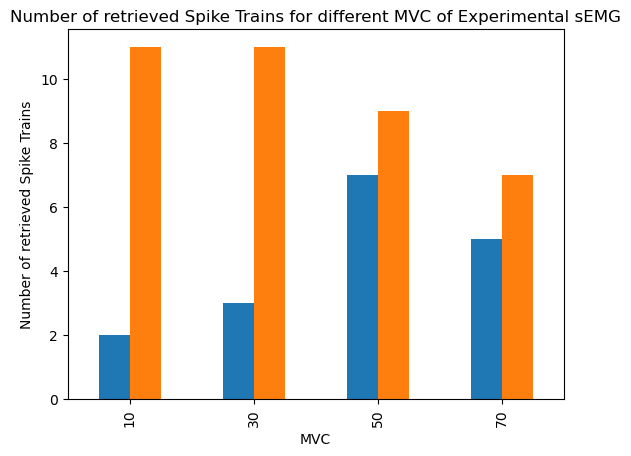

In [111]:
df = df_exp.groupby(['MVC','muscle']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3)
ax = df.unstack().plot.bar(legend=False)
ax.set_ylabel('Number of retrieved Spike Trains')
ax.set_title('Number of retrieved Spike Trains for different MVC of Experimental sEMG')
# ax.legend(df.index.get_level_values(1))
ax.figure.savefig('figs/num_of_retrieved_st_exp.svg')


Text(0.5, 1.0, 'Number of retrieved Spike Trains for different MVC of Experimental sEMG')

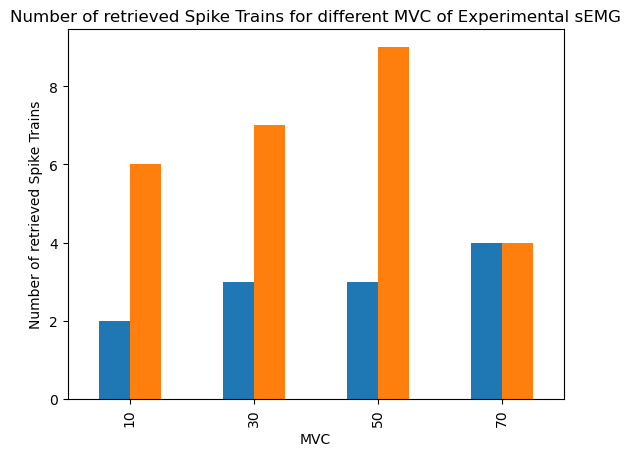

In [113]:
df = df_exp[df_exp.roa>0.5].groupby(['MVC','muscle']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3)
ax = df.unstack().plot.bar(legend=False)
ax.set_ylabel('Number of retrieved Spike Trains')
ax.set_title('Number of retrieved Spike Trains for different MVC of Experimental sEMG')
# ax.legend(df.index.get_level_values(1))


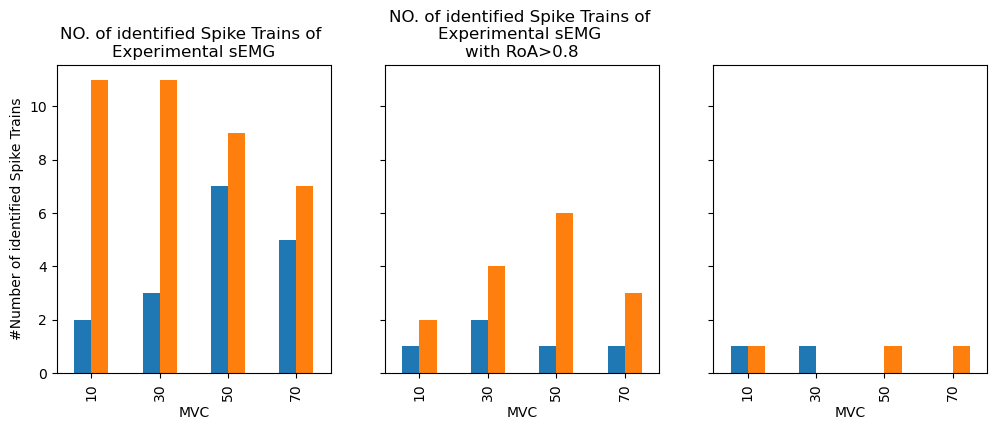

In [161]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
df_exp.groupby(['MVC','muscle']).agg({
    'related_ref':[lambda x: x.value_counts().count()],
}).round(3).unstack().plot.bar(legend=False, ax=ax0)
df_exp[df_exp.roa>0.8].groupby(['MVC','muscle']).agg({
    'related_ref':[lambda x: x.value_counts().count()],
}).round(3).unstack().plot.bar(legend=False, ax=ax1)
df_exp_op1[df_exp_op1.roa>0.8].groupby(['MVC','muscle']).agg({
    'related_ref':[lambda x: x.value_counts().count()],
}).round(3).unstack().plot.bar(legend=False, ax=ax2)
ax0.set_ylabel('#Number of identified Spike Trains')
ax0.set_title('All identified Spike Trains by PFP')
ax1.set_title('RoA > 0.8 with auto decomposition')
ax2.set_title('RoA >0.8 with manual edition')
fig.savefig('figs/compare_num_of_retrieved_st_exp.svg')

In [139]:
df_exp.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3)

related_ref
             <lambda>
MVC name             
10  GL_10           2
    GM_10          11
30  GL_30           3
    GM_30          11
50  GL_50           7
    GM_50           9
70  GL_70           5
    GM_70           7

In [140]:
print(df_exp.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3).to_latex())

\begin{tabular}{llr}
\toprule
   &       & related\_ref \\
   &       &    <lambda> \\
MVC & name &             \\
\midrule
10 & GL\_10 &           2 \\
   & GM\_10 &          11 \\
30 & GL\_30 &           3 \\
   & GM\_30 &          11 \\
50 & GL\_50 &           7 \\
   & GM\_50 &           9 \\
70 & GL\_70 &           5 \\
   & GM\_70 &           7 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\894902292.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


In [141]:
print(df_exp.groupby(['MVC', 'name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'roa':['mean','std','min','max'],
    # 'run_time':['mean','var'],
}).round(3).to_latex())
# ax.set_ylabel('F1 score')
# ax.set_title('F1 Score for different MVC of Simulated sEMG')
# ax.figure.savefig('figs/f1_score_sim.png')



\begin{tabular}{llrrrr}
\toprule
   &       & \multicolumn{4}{l}{roa} \\
   &       &   mean &    std &    min &    max \\
MVC & name &        &        &        &        \\
\midrule
10 & GL\_10 &  0.522 &  0.168 &  0.353 &  0.926 \\
   & GM\_10 &  0.480 &  0.200 &  0.199 &  1.000 \\
30 & GL\_30 &  0.571 &  0.203 &  0.319 &  0.902 \\
   & GM\_30 &  0.558 &  0.193 &  0.270 &  0.947 \\
50 & GL\_50 &  0.352 &  0.244 &  0.118 &  0.889 \\
   & GM\_50 &  0.624 &  0.201 &  0.324 &  0.934 \\
70 & GL\_70 &  0.582 &  0.163 &  0.362 &  0.936 \\
   & GM\_70 &  0.452 &  0.280 &  0.079 &  0.936 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\2835574586.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


In [154]:
df_exp_op1 = pd.read_csv('mtr_exp_op1.csv')
df_exp_op1['MVC'] = df_exp_op1.name.str.extract('(\d+)')
df_exp_op1['muscle'] = df_exp_op1.name.str.extract('([A-Z]+)')

In [143]:
df_exp_op1.shape

(287, 9)

In [144]:
df_exp_op1[df_exp_op1.rho>0.5].reset_index(drop=True).shape

(203, 9)

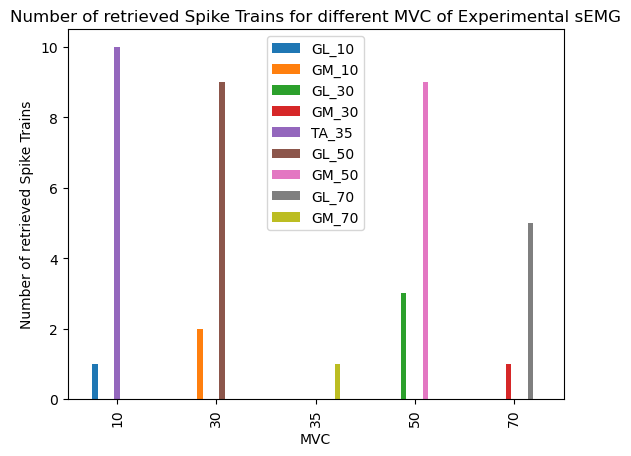

In [145]:
df = df_exp_op1.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3)
ax = df.unstack().plot.bar(legend=True)
ax.set_ylabel('Number of retrieved Spike Trains')
ax.set_title('Number of retrieved Spike Trains for different MVC of Experimental sEMG')
ax.legend(df.index.get_level_values(1))

In [146]:
print(df_exp_op1.groupby(['name','MVC']).agg({
    # 'rho': ['mean'],
    'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3).to_latex())


\begin{tabular}{llr}
\toprule
      &    & related\_ref \\
      &    &    <lambda> \\
name & MVC &             \\
\midrule
GL\_10 & 10 &           1 \\
GL\_30 & 30 &           2 \\
GL\_50 & 50 &           3 \\
GL\_70 & 70 &           1 \\
GM\_10 & 10 &          10 \\
GM\_30 & 30 &           9 \\
GM\_50 & 50 &           9 \\
GM\_70 & 70 &           5 \\
TA\_35 & 35 &           1 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\1483422085.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


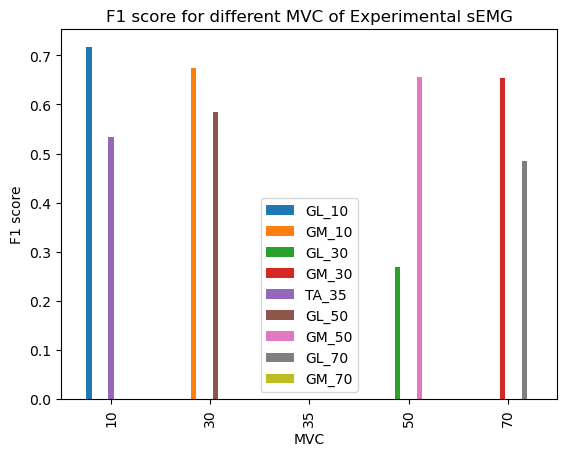

In [147]:
df = df_exp_op1.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    'f1_score':['mean'],
    # 'run_time':['mean'],
}).round(3)
ax = df.unstack().plot.bar(legend=False)
ax.set_ylabel('F1 score')
ax.set_title('F1 score for different MVC of Experimental sEMG')
ax.legend(df.index.get_level_values(1))
# ax.figure.savefig('figs/f1_score_exp_op1.png')

In [148]:
print(df_exp_op1.groupby(['MVC','name']).agg({
    # 'rho': ['mean'],
    # 'related_ref':[lambda x: x.value_counts().count()],
    # 'time_shift':['mean'],
    # 'f1_score':['mean','std','min','max'],
    'roa':['mean','std','min','max'],
    # 'run_time':['mean'],
}).round(3).to_latex())

\begin{tabular}{llrrrr}
\toprule
   &       & \multicolumn{4}{l}{roa} \\
   &       &   mean &    std &    min &    max \\
MVC & name &        &        &        &        \\
\midrule
10 & GL\_10 &  0.577 &  0.174 &  0.350 &  0.859 \\
   & GM\_10 &  0.379 &  0.147 &  0.064 &  0.927 \\
30 & GL\_30 &  0.527 &  0.173 &  0.315 &  0.928 \\
   & GM\_30 &  0.427 &  0.147 &  0.267 &  0.776 \\
35 & TA\_35 &  0.000 &  0.000 &  0.000 &  0.000 \\
50 & GL\_50 &  0.171 &  0.153 &  0.071 &  0.631 \\
   & GM\_50 &  0.502 &  0.150 &  0.257 &  0.826 \\
70 & GL\_70 &  0.499 &  0.155 &  0.290 &  0.729 \\
   & GM\_70 &  0.343 &  0.188 &  0.081 &  0.863 \\
\bottomrule
\end{tabular}



C:\Users\Edwin\AppData\Local\Temp\ipykernel_5388\3593973151.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  }).round(3).to_latex())


In [149]:
df_exp.groupby(['MVC','name','trail'])['run_time'].apply('mean').mean()/30000**2.2

1.3836802524956797e-08

In [150]:
df_sim.groupby(['MVC','name','trail'])['run_time'].apply('mean').mean()/65536**2.2

1.4436157620819522e-08

<AxesSubplot: ylabel='Frequency'>

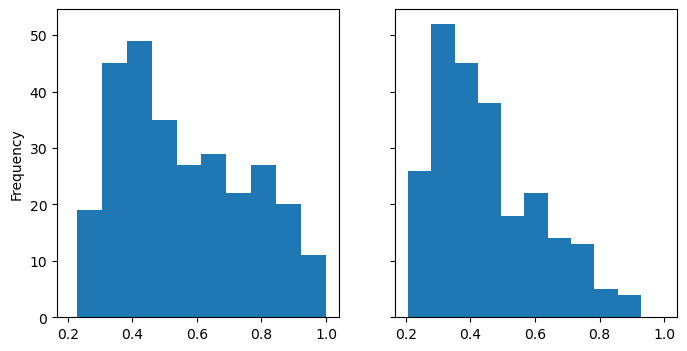

In [151]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
df_exp[df_exp.roa>0.2].roa.plot.hist(ax=ax0)
df_exp_op1[df_exp_op1.roa>0.2].roa.plot.hist(ax=ax1)
